In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [28]:
data = pd.read_csv("df.csv")
data_corr = data.drop(columns=["Company", "Sector"])

Část 1

Vytvoř korelační matici a podívej se, který ukazatel má největší vliv na indikátor Y akcie.


In [29]:
data_corr.corr()

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690,-0.040483
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599,-0.120993
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323,0.032588
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308,0.021409
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290,0.097708
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222,0.017872
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604,-0.025348
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000,-0.001363
PT,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,-0.001363,1.000000



    běžná likvidita (Current Ratio, CR),
    zadluženost (Debt to Assets, DA),
    finanční páka (Financial Leverage, FL)
    provozní zisková marže (Operating Profit Margin, OPM),
    obrat pohledávek (Receivables Turnover, RT),
    obrat celkových aktiv (Total Assets Turnover, TAT).


Část 2

    S využitím modulu statsmodels vytvoř regresní model a zobraz si tabulku se souhrnem významů. Podívej se na hodnoty koeficientů a na výsledky testu statistické významnosti koeficientů. Pokud je některý koeficient (nebo více koeficientů) nevýznamný, sestav nový model bez tohoto koeficientů (případně beze všech nevýznamných koeficientů).
    Pro všechna data odhadni ukazatel Y s využitím tvého modelu a odhadnuté ceny vlož do původní tabulky s daty. Dále vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou. Najdi akcii, kde je tento rozdíl největší (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).

Y závislou (vysvětlovanou) - svislou osu (y)
FL nezávislou (vysvětlující) - vodorovnou osu (x)

Vytvoř regresní model, který bude mít koeficient Y jako vysvětlovanou proměnnou. Do modelu vlož hodnoty ostatních indikátorů jako vysvětlující proměnné.

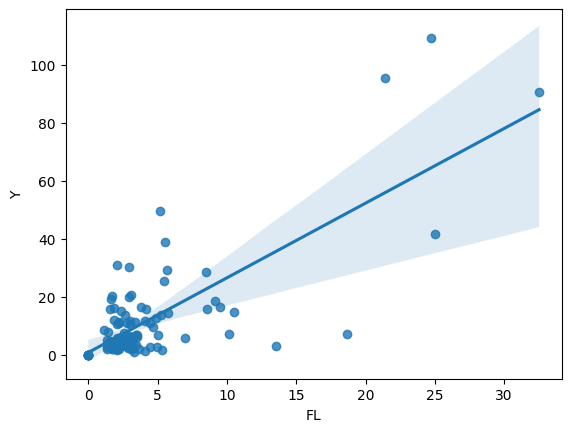

In [30]:
g = sns.regplot(data_corr, x="FL", y="Y")

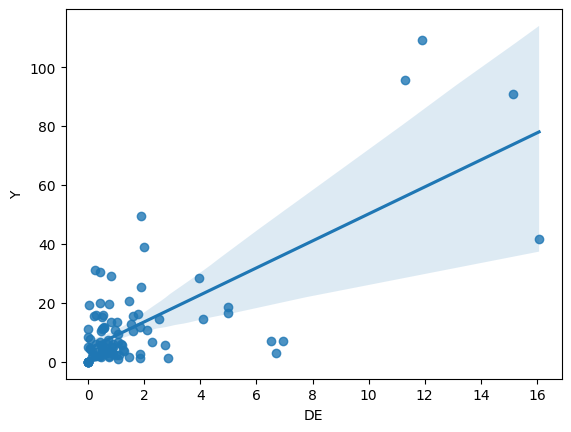

In [31]:
g = sns.regplot(data_corr, x="DE", y="Y")

 S využitím modulu statsmodels vytvoř regresní model a zobraz si tabulku se souhrnem významů. Podívej se na hodnoty koeficientů a na výsledky testu statistické významnosti koeficientů. Pokud je některý koeficient (nebo více koeficientů) nevýznamný, sestav nový model bez tohoto koeficientů (případně beze všech nevýznamných koeficientů).

In [32]:
formula = "Y ~ FL"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     133.4
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           5.42e-20
Time:                        15:15:20   Log-Likelihood:                -387.56
No. Observations:                 100   AIC:                             779.1
Df Residuals:                      98   BIC:                             784.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7026      1.526      0.461      0.646      -2.325       3.730
FL             2.5796      0.223     11.552      0.000       2.136       3.023
==============================================================================
Omnibus:                       25.531   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.617
Skew:                           0.705   Prob(JB):                     1.05e-21
Kurtosis:                       7.604   Cond. No.                         8.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
formula = "Y ~ DE"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     108.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.57e-17
Time:                        15:15:20   Log-Likelihood:                -393.30
No. Observations:                 100   AIC:                             790.6
Df Residuals:                      98   BIC:                             795.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4354      1.439      3.082      0.003       1.579       7.292
DE             4.5771      0.440     10.409      0.000       3.704       5.450
==============================================================================
Omnibus:                       27.889   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.337
Skew:                           0.905   Prob(JB):                     1.32e-18
Kurtosis:                       7.060   Cond. No.                         3.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
formula = "Y ~ CR"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03424
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.854
Time:                        15:15:20   Log-Likelihood:                -430.51
No. Observations:                 100   AIC:                             865.0
Df Residuals:                      98   BIC:                             870.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4376      3.439      3.617      0.000       5.613      19.262
CR            -0.3414      1.845     -0.185      0.854      -4.002       3.320
==============================================================================
Omnibus:                      104.266   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1091.540
Skew:                           3.600   Prob(JB):                    9.44e-238
Kurtosis:                      17.496   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
formula = "Y ~ RT"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2104
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.647
Time:                        15:15:20   Log-Likelihood:                -430.42
No. Observations:                 100   AIC:                             864.8
Df Residuals:                      98   BIC:                             870.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1899      1.919      6.353      0.000       8.382      15.997
RT            -0.0145      0.032     -0.459      0.647      -0.077       0.048
==============================================================================
Omnibus:                      104.905   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1114.068
Skew:                           3.625   Prob(JB):                    1.21e-242
Kurtosis:                      17.656   Cond. No.                         64.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
formula = "Y ~ PT"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 0.0001820
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.989
Time:                        15:15:20   Log-Likelihood:                -430.53
No. Observations:                 100   AIC:                             865.1
Df Residuals:                      98   BIC:                             870.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9153      2.284      5.217      0.000       7.383      16.447
PT            -0.0021      0.154     -0.013      0.989      -0.307       0.303
==============================================================================
Omnibus:                      104.677   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1105.264
Skew:                           3.617   Prob(JB):                    9.89e-241
Kurtosis:                      17.592   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
formula = "Y ~ OPM"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2587
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.612
Time:                        15:15:20   Log-Likelihood:                -430.39
No. Observations:                 100   AIC:                             864.8
Df Residuals:                      98   BIC:                             870.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6563      3.036      3.510      0.001       4.631      16.681
OPM            6.1036     12.001      0.509      0.612     -17.712      29.919
==============================================================================
Omnibus:                      105.698   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.507
Skew:                           3.656   Prob(JB):                    2.97e-249
Kurtosis:                      17.874   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
formula = "Y ~ DA"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.729
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.102
Time:                        15:15:20   Log-Likelihood:                -429.15
No. Observations:                 100   AIC:                             862.3
Df Residuals:                      98   BIC:                             867.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4395      3.755      1.715      0.090      -1.013      13.892
DA            17.7812     10.764      1.652      0.102      -3.579      39.141
==============================================================================
Omnibus:                       97.383   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.197
Skew:                           3.320   Prob(JB):                    1.11e-194
Kurtosis:                      16.049   Cond. No.                         6.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
formula = "Y ~ TAT"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     9.779
Date:                Tue, 28 Nov 2023   Prob (F-statistic):            0.00232
Time:                        15:15:20   Log-Likelihood:                -425.77
No. Observations:                 100   AIC:                             855.5
Df Residuals:                      98   BIC:                             860.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2309      2.998      1.411      0.161      -1.719      10.181
TAT           10.4124      3.330      3.127      0.002       3.805      17.020
==============================================================================
Omnibus:                       90.581   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.325
Skew:                           3.039   Prob(JB):                    8.66e-163
Kurtosis:                      14.924   Cond. No.                         3.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
data_reg = data_corr.drop(columns=["CR", "RT", "PT", "OPM", "DA"])

Pro všechna data odhadni ukazatel Y s využitím tvého modelu a odhadnuté ceny vlož do původní tabulky s daty. Dále vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou. Najdi akcii, kde je tento rozdíl největší (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).

In [41]:
data_reg.corr()

,FL,TAT,DE,Y
FL,1.000000,0.156169,0.968612,0.759323
TAT,0.156169,1.000000,0.094869,0.301222
DE,0.968612,0.094869,1.000000,0.724604
Y,0.759323,0.301222,0.724604,1.000000


In [43]:
data["Y_Diff"] = data["Y_Predicted"] - data["Y"]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_Predicted,Y_Diff
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,8.395846,6.445846
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,7.979349,0.719349
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,11.727819,3.947819
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,22.973228,16.803228
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,13.914426,13.914426


In [55]:
data.loc[data["Y_Diff"].idxmax()]

Company                     n2wGj
CR                            1.0
DA                           0.14
FL                           3.37
OPM                        0.0349
RT                         106.52
TAT                          3.24
DE                           0.49
Y                            11.3
PT                          10.49
Sector         Consumer Defensive
Y_Predicted             37.967108
Y_Diff                  26.667108
Name: 56, dtype: object